In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [183]:
df = pd.read_csv('data/victims-of-selected-major-offences-by-age-group.csv')
print(df.shape)
df.head()

(873, 4)


,year,level_1,level_2,value
0,2011,Total Victims Of Murder,Above 21 Years Old,16
1,2011,Total Victims Of Murder,21 Years Old And Below,0
2,2011,Total Victims Of Murder,Youths (7 To 19 Years Old),0
3,2011,Total Victims Of Murder,Unknown Age,0
4,2011,Male Victims Of Murder,Above 21 Years Old,10


In [184]:
df['gender'] = df['level_1'].str.split(" ", 1, expand = True)[0]
df['offenceType'] = df['level_1'].str.split(" ", 3, expand = True)[3]

In [185]:
col = 'level_2'
conditions = [df[col].isin(['Youths (7 To 19 Years Old)']), df[col].isin(['21 Years Old And Below']), df[col].isin(['Above 21 Years Old'])]
choices = ['7-19', '<21', '21>']
    
df["age"] = np.select(conditions, choices, default = None)

In [186]:
df = df[~df['age'].isnull()]
df = df[df['age'] != '7-19']

In [187]:
df = df[['year', 'age', 'gender', 'offenceType', 'value']]
df = pd.DataFrame(df.groupby(['year', 'gender', 'offenceType'])['value'].sum().reset_index())
df_t = df[df['gender'] == 'Total']
df_n = df[df['gender'] != 'Total']
df_f = df[df['gender'] == 'Female']
df_m = df[df['gender'] == 'Male']
df.head()

,year,gender,offenceType,value
0,2011,Female,Cheating & Related,982
1,2011,Female,Murder,6
2,2011,Female,Outrage Of Modesty,1396
3,2011,Female,Rape,150
4,2011,Female,Rioting,21


In [188]:
df_p = pd.pivot_table(df, values='value', index=['year', 'offenceType'], columns=['gender'], aggfunc="sum").reset_index()
df_p.head()

gender,year,offenceType,Female,Male,Total
0,2011,Cheating & Related,982,1284,2266
1,2011,Murder,6,10,16
2,2011,Outrage Of Modesty,1396,82,1478
3,2011,Rape,150,0,150
4,2011,Rioting,21,239,260


In [180]:
df_p.to_csv('victims.csv')
# df_t.to_csv('victims_total.csv')
# df_m.to_csv('victims_male.csv')
# df_f.to_csv('victims_female.csv')

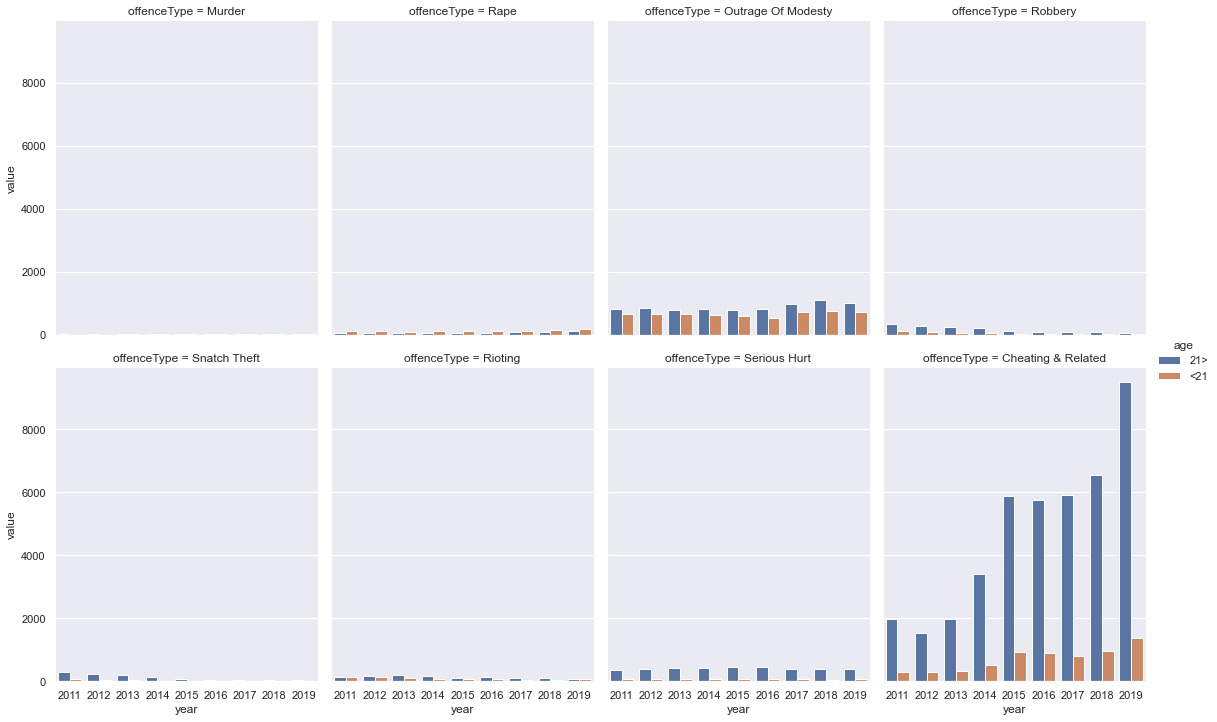

In [132]:
sns.catplot(x='year', y='value', hue='age', col='offenceType', col_wrap = 4, kind = 'bar', data=df[df['gender'] == 'Total'], height=5, aspect=.8)

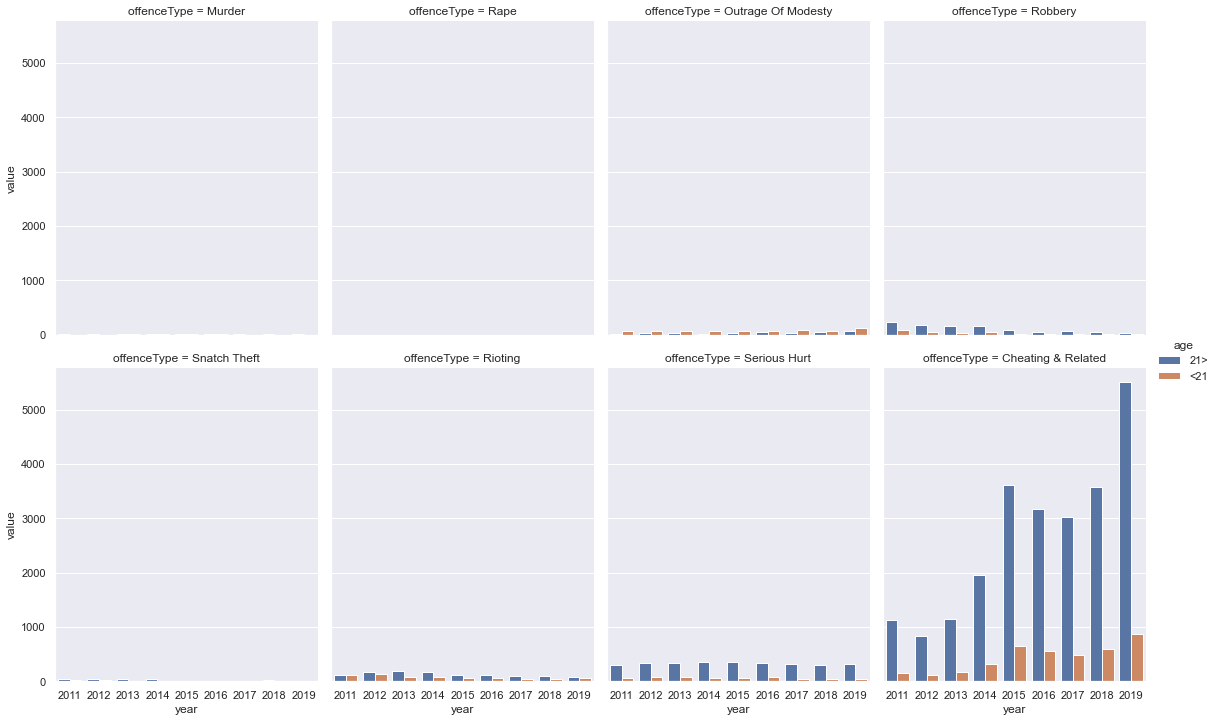

In [133]:
sns.catplot(x='year', y='value', hue='age', col='offenceType', col_wrap = 4, kind = 'bar', data=df[df['gender'] == 'Male'], height=5, aspect=.8)

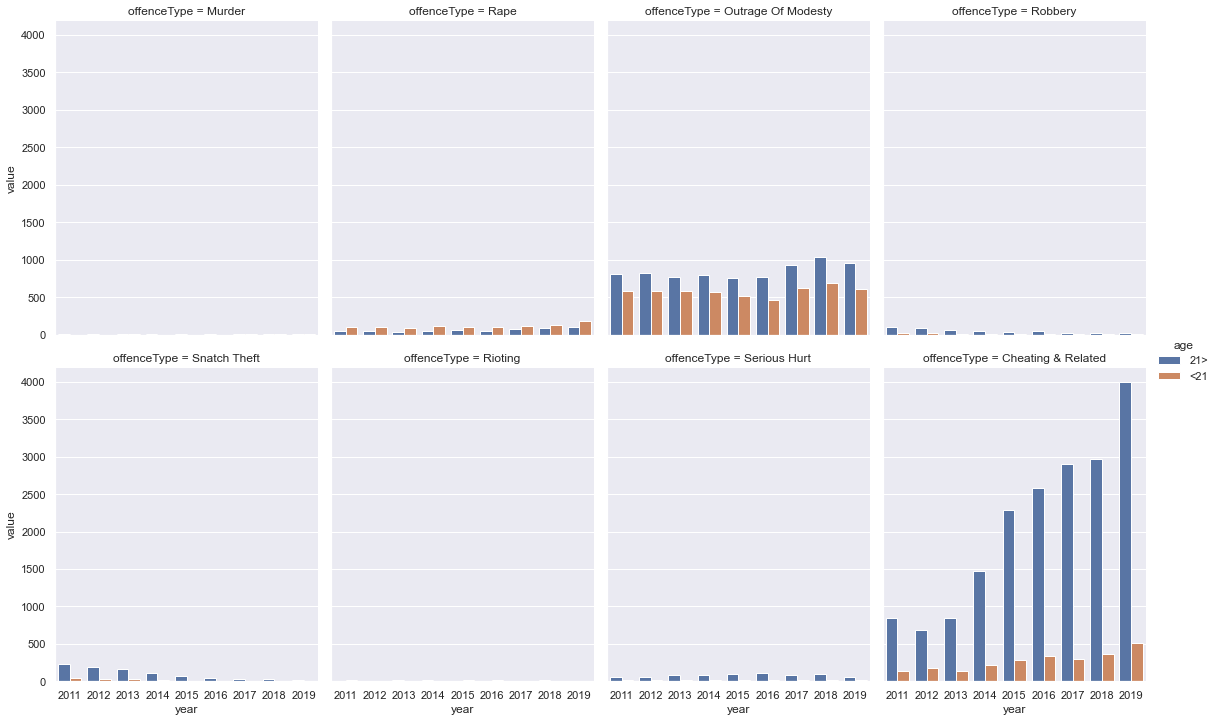

In [134]:
sns.catplot(x='year', y='value', hue='age', col='offenceType', col_wrap = 4, kind = 'bar', data=df[df['gender'] == 'Female'], height=5, aspect=.8)